In [23]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [24]:
# Read the data

df = pd.read_csv('diabetes.csv')

In [25]:
# Print the first 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# Get the shape of the data
df.shape

(768, 9)

In [27]:
# Check the data types of the variables
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# Check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
# Get the most important features
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

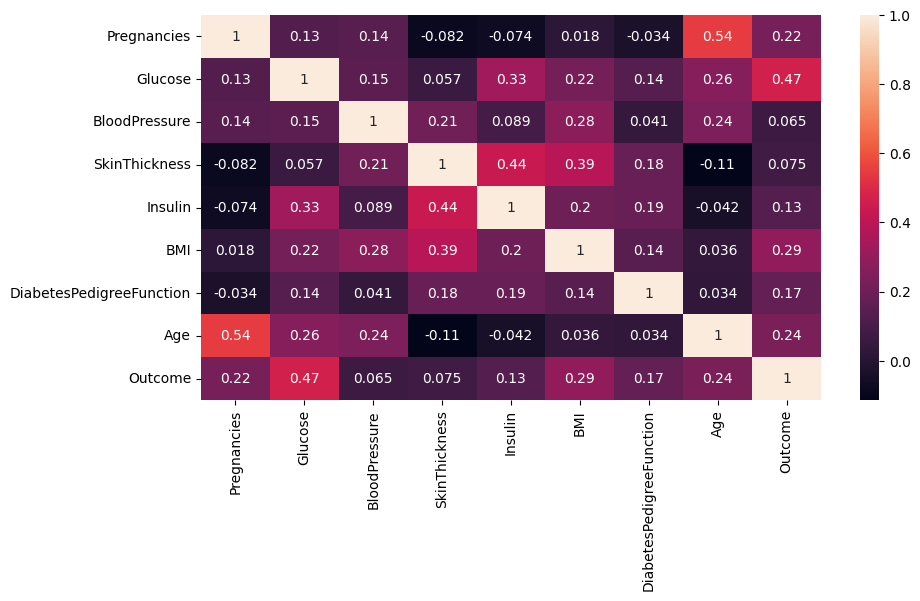

In [31]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [32]:
# Only get the most correlated features
target = df[['Outcome']]
df = df[['Glucose', 'BMI', 'Age']]

labels = ['Glucose', 'BMI', 'Age']

In [33]:
# Show the first 5 rows of the data
df.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [34]:
plotDF = pd.concat([df, target],axis=1)

In [35]:
plotDF

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1
...,...,...,...,...
763,101,32.9,63,0
764,122,36.8,27,0
765,121,26.2,30,0
766,126,30.1,47,1


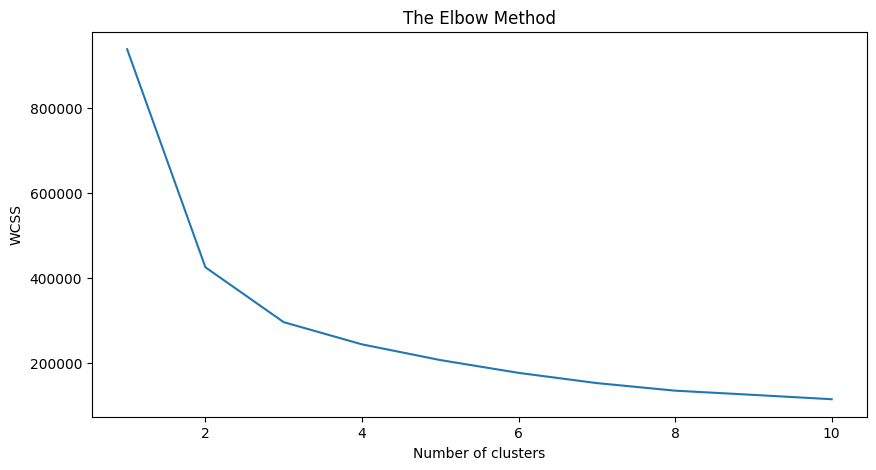

In [36]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [38]:
plotDF['Predict']= y_kmeans

In [39]:
plotDF[plotDF['Predict']==0].describe()

,Glucose,BMI,Age,Outcome,Predict
count,308.000000,308.000000,308.000000,308.000000,308.0
mean,91.746753,30.144805,29.775974,0.129870,0.0
std,16.503898,7.826890,9.675104,0.336708,0.0
min,0.000000,0.000000,21.000000,0.000000,0.0
25%,85.000000,25.175000,22.000000,0.000000,0.0
50%,95.000000,30.100000,26.000000,0.000000,0.0
75%,102.000000,35.400000,34.000000,0.000000,0.0
max,109.000000,55.000000,68.000000,1.000000,0.0


In [43]:
plotDF[plotDF['Predict']==1].describe()

,Glucose,BMI,Age,Outcome,Predict
count,152.000000,152.000000,152.000000,152.000000,152.0
mean,169.611842,35.093421,39.072368,0.750000,1.0
std,15.043447,6.780549,12.637117,0.434444,0.0
min,145.000000,21.000000,21.000000,0.000000,1.0
25%,156.750000,30.500000,28.000000,0.750000,1.0
50%,167.500000,34.250000,37.000000,1.000000,1.0
75%,181.000000,39.100000,49.000000,1.000000,1.0
max,199.000000,59.400000,70.000000,1.000000,1.0


In [44]:
plotDF[plotDF['Predict']==2].describe()

,Glucose,BMI,Age,Outcome,Predict
count,308.000000,308.000000,308.000000,308.000000,308.0
mean,126.000000,32.310065,33.827922,0.370130,2.0
std,10.801134,7.945933,12.006225,0.483625,0.0
min,108.000000,0.000000,21.000000,0.000000,2.0
25%,117.000000,27.600000,24.000000,0.000000,2.0
50%,125.000000,32.400000,30.000000,0.000000,2.0
75%,135.000000,36.300000,41.000000,1.000000,2.0
max,148.000000,67.100000,81.000000,1.000000,2.0


In [47]:
plotDF

,Glucose,BMI,Age,Outcome,Predict
0,148,33.6,50,1,1
1,85,26.6,31,0,0
2,183,23.3,32,1,1
3,89,28.1,21,0,0
4,137,43.1,33,1,2
...,...,...,...,...,...
763,101,32.9,63,0,0
764,122,36.8,27,0,2
765,121,26.2,30,0,2
766,126,30.1,47,1,2


In [64]:
print(plotDF[plotDF['Predict']==0].groupby("Outcome").count())

print(plotDF[plotDF['Predict']==1].groupby("Outcome").count())

print(plotDF[plotDF['Predict']==2].groupby("Outcome").count())

         Glucose  BMI  Age  Predict
Outcome                            
0            268  268  268      268
1             40   40   40       40
         Glucose  BMI  Age  Predict
Outcome                            
0             38   38   38       38
1            114  114  114      114
         Glucose  BMI  Age  Predict
Outcome                            
0            194  194  194      194
1            114  114  114      114


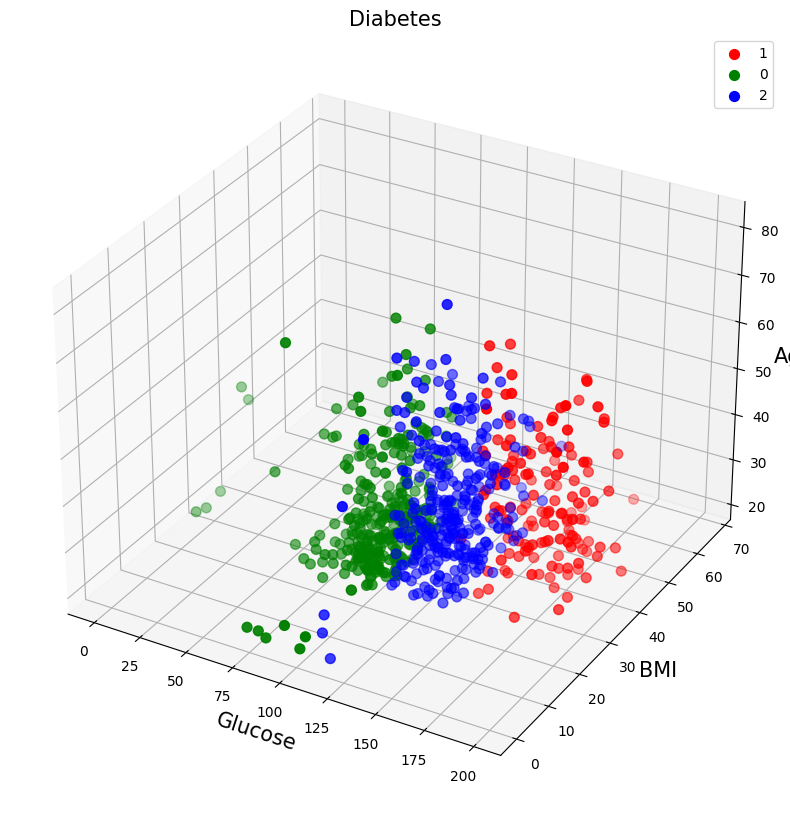

In [45]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.set_xlabel('Glucose', fontsize = 15)
ax.set_ylabel('BMI', fontsize = 15)
ax.set_zlabel('Age', fontsize = 15)
ax.set_title('Diabetes', fontsize = 15)
targets = plotDF['Predict'].unique()
colors = ['r','g','b','c','m','y']

for target, color in zip(targets, colors):
  ax.scatter(plotDF[plotDF['Predict']==target]['Glucose'],
             plotDF[plotDF['Predict']==target]['BMI'],
             plotDF[plotDF['Predict']==target]['Age'],
             c = color, s = 50)
  ax.legend(targets)
  ax.grid()

In [48]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))